In [189]:
# Importing the necessary libaries
import pandas as pd
import numpy as np
from pandas import read_csv, get_dummies, Series
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report,ConfusionMatrixDisplay,plot_confusion_matrix
import matplotlib.pyplot as plt

In [190]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [191]:
#Let's import the dataset and examine it
data = pd.read_csv('CustomerChurn.csv')
pd.set_option('display.max_columns', None)
#data.head()
print(data.head())

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1144,42
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1291,33
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1887,20
3,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,816,28
4,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,1088,24


#### Let's explore the shape of the dataset

In [4]:
print(data.shape)

(6237, 16)


# Data Preparation and Cleaning

In [5]:
print(data.dtypes) #check for categorical and continuous variables

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive               int64
Contacts_Count                int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [6]:
''' Creating a list of the categorical features '''
obj_cols = []
for i in data:
     if data[i].dtypes == 'object':
        obj_cols.append(i)

In [7]:
''' Creating a list of the continuous features '''
cont_cols = []
for i in data:
    if data[i].dtypes == 'int64' or data[i].dtypes == 'float64':
        cont_cols.append(i)

#### Checking for NaN and null values in the continuous variables

In [8]:
for k in cont_cols:
    print(k, ":", data[k].isnull().sum())


Customer_Age : 0
Dependent_count : 0
Months_on_book : 0
Total_Relationship_Count : 0
Months_Inactive : 0
Contacts_Count : 0
Credit_Limit : 0
Total_Revolving_Bal : 0
Total_Trans_Amt : 0
Total_Trans_Ct : 0


In [9]:
for k in cont_cols:
    print(k, ":", data[k].isna().sum())

Customer_Age : 0
Dependent_count : 0
Months_on_book : 0
Total_Relationship_Count : 0
Months_Inactive : 0
Contacts_Count : 0
Credit_Limit : 0
Total_Revolving_Bal : 0
Total_Trans_Amt : 0
Total_Trans_Ct : 0


#### Encoding the categorical variables

In [166]:
for k in obj_cols:
    print(k, ":", data[k].nunique())

Attrition_Flag : 2
Gender : 2
Education_Level : 5
Marital_Status : 3
Income_Category : 5
Card_Category : 4


In [10]:
# Let's find out the number of classes in each categorical feature
for k in obj_cols:
    print(k, ":", data[k].unique())
   

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Post-Graduate' 'Doctorate']
Marital_Status : ['Married' 'Single' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


In [192]:
'''
- We will use labelencoder for Attrition_Flag, Gender and Marital_Status.
- We will use one-hot encoding for Education_Level, Income_Category and Card_Category.
'''
categorical_features = ['Education_Level','Income_Category','Card_Category']
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1}) 
data['Gender'] = data['Gender'].map({'M':0, 'F':1})
data['Marital_Status'] = data['Marital_Status'].map({'Married':0, 'Single':1, 'Divorced':2})

dataset = pd.get_dummies(data, columns=categorical_features)
print(dataset.head())

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,0,39,5,1,3,12691.0,777,1144,42,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,0,49,1,5,1,44,6,1,2,8256.0,864,1291,33,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,0,51,0,3,0,36,4,1,0,3418.0,0,1887,20,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,0,40,0,3,0,21,5,1,0,4716.0,0,816,28,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,0,44,0,2,0,36,3,1,2,4010.0,1247,1088,24,0,1,0,0,0,0,1,0,0,0,1,0,0,0


#### Dividing the dataset into label and feature set

In [193]:
X = dataset.drop('Attrition_Flag', axis = 1) # Features
Y = dataset['Attrition_Flag'] # Labels
# print(type(X))
# print(type(Y))
print(X.shape)
print(Y.shape)


(6237, 26)
(6237,)


In [194]:
# Let's obtain a list of the dataset columns for renaming the normalized data
print(dataset.columns) # --> label + feature sets

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Marital_Status', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive', 'Contacts_Count', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')

In [14]:
# Feature set only
dataset_cols = ['Customer_Age', 'Gender', 'Dependent_count',
       'Marital_Status', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive', 'Contacts_Count', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver']

### Data standardization, balancing and splitting

In [195]:
# Data scaling
X_scaled = StandardScaler().fit_transform(X.astype(float)) 
X_scaled = pd.DataFrame(X_scaled,columns=dataset_cols)
print(X_scaled.head())

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.171606,-0.954076,0.515489,-0.906850,0.375830,0.758354,-1.342617,0.484517,0.464535,-0.485968,-0.933855,-0.941811,-0.246769,-0.842996,1.665275,-0.272458,-0.489102,-0.297459,-0.497644,2.314692,-0.447343,-0.810021,0.268705,-0.104207,-0.042033,-0.240864
1,0.325459,1.048135,2.057506,0.669523,1.002414,1.405216,-1.342617,-0.416746,-0.024039,-0.378604,-0.891850,-1.318392,-0.246769,1.186246,-0.600502,-0.272458,-0.489102,-0.297459,-0.497644,-0.432023,-0.447343,1.234536,0.268705,-0.104207,-0.042033,-0.240864
2,0.573991,-0.954076,0.515489,-0.906850,-0.000121,0.111492,-1.342617,-2.219272,-0.557008,-1.444839,-0.721543,-1.862343,-0.246769,1.186246,-0.600502,-0.272458,-0.489102,-0.297459,-0.497644,-0.432023,2.235423,-0.810021,0.268705,-0.104207,-0.042033,-0.240864
3,-0.792936,-0.954076,0.515489,-0.906850,-1.879873,0.758354,-1.342617,-2.219272,-0.414016,-1.444839,-1.027581,-1.527604,-0.246769,-0.842996,-0.600502,-0.272458,2.044562,-0.297459,-0.497644,2.314692,-0.447343,-0.810021,0.268705,-0.104207,-0.042033,-0.240864
4,-0.295872,-0.954076,-0.255519,-0.906850,-0.000121,-0.535370,-1.342617,-0.416746,-0.491792,0.094045,-0.949857,-1.694973,-0.246769,1.186246,-0.600502,-0.272458,-0.489102,-0.297459,2.009469,-0.432023,-0.447343,-0.810021,0.268705,-0.104207,-0.042033,-0.240864


In [196]:
# Data splitting
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.30, random_state = 123)
print(X_train.shape)
print(X_test.shape)

(4365, 26)
(1872, 26)


In [33]:
# Saving cleaned dataset for use in the SVC models

# X_train.to_csv('CA_data/train_features.csv', index=False)
# X_test.to_csv('CA_data/test_features.csv', index=False)

# Y_train.to_csv('CA_data/train_labels.csv', index=False)
# Y_test.to_csv('CA_data/test_labels.csv', index=False)

In [197]:
# Data balancing
print("Number of observations in each class before oversampling (training data): \n", Series(Y_train).value_counts())

Number of observations in each class before oversampling (training data): 
 0    3660
1     705
Name: Attrition_Flag, dtype: int64


In [18]:
X_train,Y_train = SMOTE (random_state = 100).fit_resample(X_train,Y_train) 
print("Number of observations in each class after oversampling (training data): \n", Series(Y_train).value_counts())

Number of observations in each class after oversampling (training data): 
 0    3660
1    3660
Name: Attrition_Flag, dtype: int64


# Random Forest Classification (RFC)

#### Method 1. We will begin by fitting a basic RFC model in its default setting
n_estimators=100, criterion='gini', max_features='auto'

In [19]:
rfc_default = RandomForestClassifier(random_state=101)

In [20]:
print(rfc_default.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [21]:
rfc_default.fit(X_train,Y_train) # Training

RandomForestClassifier(random_state=101)

In [22]:
default_pred = rfc_default.predict(X_test) #Testing

In [23]:
print("<-------rfc_default classification metrics---------------->")
print("rfc_default accuracy is:", round(accuracy_score(Y_test, default_pred),4),'≈', 
      round(accuracy_score(Y_test, default_pred)*100,2),'%')
print("rfc_default recall is:", round(recall_score(Y_test, default_pred),4),'≈', 
      round(recall_score(Y_test, default_pred)*100,2),'%')
print("rfc_default precision is:", round(precision_score(Y_test, default_pred),4),'≈', 
      round(precision_score(Y_test, default_pred)*100,2),'%')

<-------rfc_default classification metrics---------------->
rfc_default accuracy is: 0.9418 ≈ 94.18 %
rfc_default recall is: 0.7971 ≈ 79.71 %
rfc_default precision is: 0.8059 ≈ 80.59 %


In [24]:
print("<-------rfc_default confusion matrix--------------->")
con_matrix_default = confusion_matrix(Y_test, default_pred)
print (con_matrix_default)

<-------rfc_default confusion matrix--------------->
[[1543   53]
 [  56  220]]


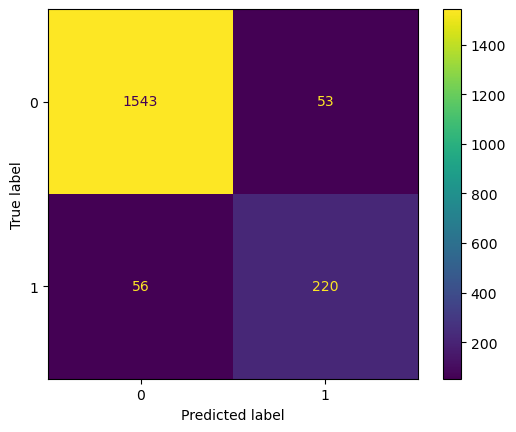

In [29]:
plot_confusion_matrix(rfc_default,X_test,Y_test)
#plt.savefig('rfc_default_cm.png')

In [228]:
print(classification_report(Y_test,default_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1596
           1       0.81      0.80      0.80       276

    accuracy                           0.94      1872
   macro avg       0.89      0.88      0.88      1872
weighted avg       0.94      0.94      0.94      1872



#### Method 2. Fit a RFC model with some parameters (manually chosen parameters)
Parameters used: n_estimators=50, criterion='entropy', max_features='auto'

In [30]:
rfc_50 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_features='auto',random_state=102)
rfc_50.fit(X_train,Y_train) # Training

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=102)

In [31]:
pred_rfc50 = rfc_50.predict(X_test) #Testing

In [32]:
print("<-------rfc_50 classification metrics---------------->")
print("rfc_50 accuracy is:", round(accuracy_score(Y_test, pred_rfc50),4),'≈', 
      round(accuracy_score(Y_test, pred_rfc50)*100,2),'%')
print("rfc_50 recall is:", round(recall_score(Y_test, pred_rfc50),4),'≈', 
      round(recall_score(Y_test, pred_rfc50)*100,2),'%')
print("rfc_50 precision is:", round(precision_score(Y_test, pred_rfc50),4),'≈', 
      round(precision_score(Y_test, pred_rfc50)*100,2),'%')

<-------rfc_50 classification metrics---------------->
rfc_50 accuracy is: 0.9428 ≈ 94.28 %
rfc_50 recall is: 0.8043 ≈ 80.43 %
rfc_50 precision is: 0.8073 ≈ 80.73 %


In [38]:
print("<------- rfc50 confusion matrix---------------->")
con_matrix_rfc50 = confusion_matrix(Y_test, pred_rfc50)
print (con_matrix_rfc50)

<------- rfc50 confusion matrix---------------->
[[1543   53]
 [  54  222]]


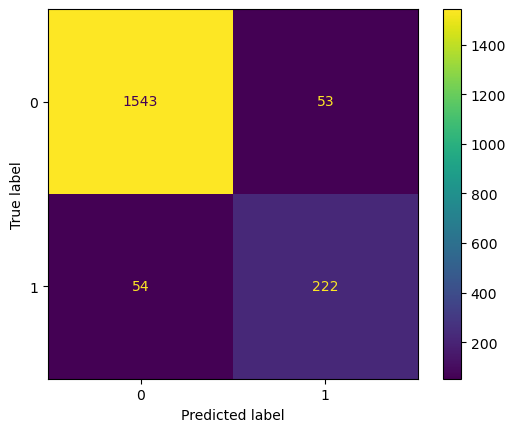

In [34]:
plot_confusion_matrix(rfc_50,X_test,Y_test)
#plt.savefig('rfc_50_cm.png')

#### Method 3. Fit a RFC model using GridSearchCV


In [35]:
rfc_gs = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=103) # building model
no_trees = {'n_estimators': [200, 250, 300, 350, 400, 450, 500, 550, 600]}
grid_search = GridSearchCV(estimator=rfc_gs, param_grid=no_trees, scoring='recall', cv=5)
grid_search.fit(X_train, Y_train) #training
best_parameters = grid_search.best_params_
print(best_parameters)
best_result = grid_search.best_score_
print(best_result)

{'n_estimators': 300}
0.9683060109289618


#### Predict using the using the best model (number of trees) found with GridSearchCV
'n_estimators': 300

In [36]:
rfc_300 = RandomForestClassifier(n_estimators=300, criterion='entropy', max_features='auto',random_state=110)
rfc_300.fit(X_train,Y_train) # Training

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=110)

In [37]:
pred_rfc300 = grid_search.predict(X_test)

In [39]:
print("<-------rfc_300 classification metrics---------------->")
print("rfc_300 accuracy is:", round(accuracy_score(Y_test, pred_rfc300),4),'≈', 
      round(accuracy_score(Y_test, pred_rfc300)*100,2),'%')
print("rfc_300 recall is:", round(recall_score(Y_test, pred_rfc300),4),'≈', 
      round(recall_score(Y_test, pred_rfc300)*100,2),'%')
print("rfc_300 precision is:", round(precision_score(Y_test, pred_rfc300),4),'≈', 
      round(precision_score(Y_test, pred_rfc300)*100,2),'%')

<-------rfc_300 classification metrics---------------->
rfc_300 accuracy is: 0.9444 ≈ 94.44 %
rfc_300 recall is: 0.8188 ≈ 81.88 %
rfc_300 precision is: 0.8071 ≈ 80.71 %


In [40]:
print("<------- rfc300 confusion matrix---------------->")
con_matrix_rfc300 = confusion_matrix(Y_test, pred_rfc300)
print (con_matrix_rfc300)

<------- rfc300 confusion matrix---------------->
[[1542   54]
 [  50  226]]


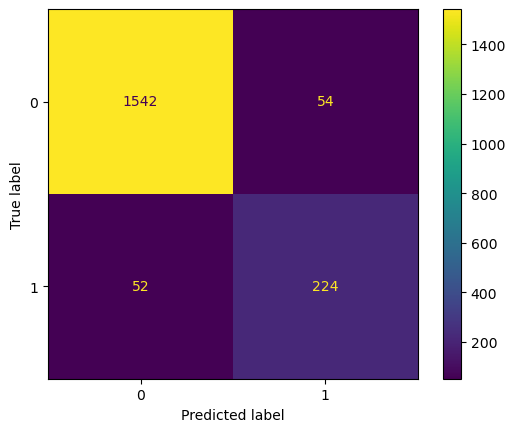

In [42]:
plot_confusion_matrix(rfc_300,X_test,Y_test)
#plt.savefig('rfc300_cm.png')

#### Method 4. Fit a RFC model using the top 12 most important features found using the best number of trees

In [43]:
# Let's obtain the most important features
imp_features = Series(rfc_300.feature_importances_, index=list(X)).sort_values(ascending=False)
print(imp_features)

Total_Trans_Ct                    0.222110
Total_Trans_Amt                   0.175827
Total_Revolving_Bal               0.139233
Months_Inactive                   0.083412
Total_Relationship_Count          0.073001
Contacts_Count                    0.062572
Credit_Limit                      0.046783
Customer_Age                      0.041068
Months_on_book                    0.032014
Dependent_count                   0.029775
Marital_Status                    0.027544
Gender                            0.014806
Education_Level_Graduate          0.005704
Income_Category_Less than $40K    0.005607
Education_Level_High School       0.005383
Education_Level_Uneducated        0.005166
Income_Category_$80K - $120K      0.004824
Income_Category_$40K - $60K       0.004670
Income_Category_$60K - $80K       0.003993
Card_Category_Blue                0.003782
Education_Level_Post-Graduate     0.003435
Income_Category_$120K +           0.003135
Education_Level_Doctorate         0.002708
Card_Catego

([], [])

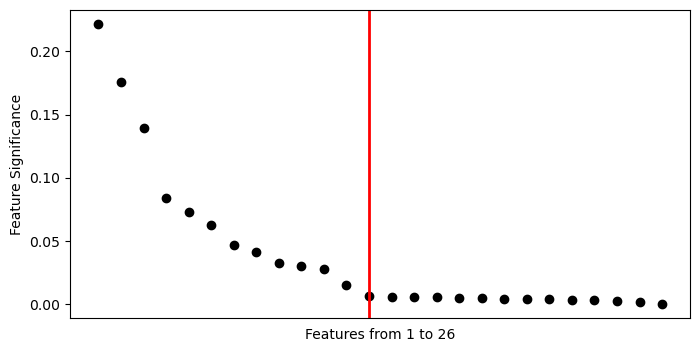

In [212]:
'Lets plot the feature importance'
plt.figure(figsize=(8, 4))
plt.plot(imp_features,'ko')
plt.axvline(x=12, color='r',linewidth=2)
plt.xlabel('Features from 1 to 26')
plt.ylabel('Feature Significance')
plt.xticks([])
#plt.savefig('imp_features.png')

#### Using plot above, we will select the top 12 where there is a sharp decline in feature importance (just like the elbow method)

In [213]:
print(imp_features[:12])

Total_Trans_Ct              0.222110
Total_Trans_Amt             0.175827
Total_Revolving_Bal         0.139233
Months_Inactive             0.083412
Total_Relationship_Count    0.073001
Contacts_Count              0.062572
Credit_Limit                0.046783
Customer_Age                0.041068
Months_on_book              0.032014
Dependent_count             0.029775
Marital_Status              0.027544
Gender                      0.014806
dtype: float64

In [88]:
reduced_features = imp_features.index
reduced_features = list(reduced_features)
reduced_features = reduced_features[:12] #Let's take the top 12

In [89]:
print(reduced_features)

['Total_Trans_Ct',
 'Total_Trans_Amt',
 'Total_Revolving_Bal',
 'Months_Inactive',
 'Total_Relationship_Count',
 'Contacts_Count',
 'Credit_Limit',
 'Customer_Age',
 'Months_on_book',
 'Dependent_count',
 'Marital_Status',
 'Gender']

In [90]:
n_estimators=[64,100,128,200,250,300]
max_features= [2,4,6,8,10,12,'auto']


In [91]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features}  

In [92]:
# Using the top 12 important features only 

X_imp = dataset[['Total_Trans_Ct','Total_Trans_Amt','Total_Revolving_Bal','Months_Inactive',
                'Total_Relationship_Count','Contacts_Count','Credit_Limit','Customer_Age',
                'Months_on_book','Dependent_count','Marital_Status','Gender']]
X_imp_scaled = StandardScaler().fit_transform(X_imp) # scaling
X_imp_train, X_imp_test, Y_imp_train, Y_imp_test = train_test_split( X_imp_scaled, Y, test_size = 0.3, random_state = 105)# splitting
X_imp_train,Y_imp_train =SMOTE (random_state = 100).fit_resample(X_imp_train,Y_imp_train)# balancing

In [93]:
rfc_imp = RandomForestClassifier(random_state=106) # building classifier

grid_search2 = GridSearchCV(estimator=rfc_imp, param_grid=param_grid, scoring='recall', cv=5)
grid_search2.fit(X_imp_train, Y_imp_train) #training 

best_parameters_imp = grid_search2.best_params_
print(best_parameters_imp)
best_result_imp = grid_search2.best_score_
print(best_result_imp)

{'max_features': 2, 'n_estimators': 200}
0.9768381218611879


In [28]:
pred_gs2 = grid_search2.predict(X_imp_test)

In [29]:
print("----rfc with max_features: 2 and 200 trees (using top 12 features) metrics----------------")
print("rfc with max_features: 2 and 200 trees accuracy is:", round(accuracy_score(Y_imp_test, pred_gs2),4),'≈', 
      round(accuracy_score(Y_imp_test, pred_gs2)*100,2),'%')
print("rfc with max_features: 2 and 200 trees recall is:", round(recall_score(Y_imp_test, pred_gs2),4),'≈', 
      round(recall_score(Y_imp_test, pred_gs2)*100,2),'%')
print("rfc with max_features: 2 and 200 trees precision is:", round(precision_score(Y_imp_test, pred_gs2),4),'≈', 
      round(precision_score(Y_imp_test, pred_gs2)*100,2),'%')

----rfc with max_features: 2 and 200 trees (using top 12 features) metrics----------------
rfc with max_features: 2 and 200 trees accuracy is: 0.9535 ≈ 95.35 %
rfc with max_features: 2 and 200 trees recall is: 0.8667 ≈ 86.67 %
rfc with max_features: 2 and 200 trees precision is: 0.8345 ≈ 83.45 %


In [30]:
print("----rfc with max_features: 2 and 200 trees (using top 12 features) confusion matrix----------------")
con_matrix_gs2 = confusion_matrix(Y_imp_test, pred_gs2)
print (con_matrix_gs2)

----rfc with max_features: 2 and 200 trees (using top 12 features) confusion matrix----------------
[[1538   49]
 [  38  247]]


#### Checking the influence of excluding the max_features on the model with the top 12 features 

In [150]:
rfc_imp = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=106) # building classifier
no_trees = {'n_estimators': [100, 200, 250, 300, 350, 400]}
grid_search3 = GridSearchCV(estimator=rfc_imp, param_grid=no_trees, scoring='recall', cv=5)
grid_search3.fit(X_imp_train, Y_imp_train) #training 

best_parameters_imp3 = grid_search3.best_params_
print(best_parameters_imp3)
best_result_imp3 = grid_search3.best_score_
print(best_result_imp3)


{'n_estimators': 200}
0.9771109731572315


In [155]:
pred_gs3 = grid_search3.predict(X_imp_test)


In [200]:
print("rfc with 200 trees accuracy is:", round(accuracy_score(Y_imp_test, pred_gs3),4),'≈', 
      round(accuracy_score(Y_imp_test, pred_gs3)*100,2),'%')
print("rfc with 200 trees recall is:", round(recall_score(Y_imp_test, pred_gs3),4),'≈', 
      round(recall_score(Y_imp_test, pred_gs3)*100,2),'%')
print("rfc with 200 trees precision is:", round(precision_score(Y_imp_test, pred_gs3),4),'≈', 
      round(precision_score(Y_imp_test, pred_gs3)*100,2),'%')

rfc with 200 trees accuracy is: 0.9514 ≈ 95.14 %
rfc with 200 trees recall is: 0.8702 ≈ 87.02 %
rfc with 200 trees precision is: 0.8212 ≈ 82.12 %


In [203]:
print("--------rfc with 200 trees confusion matrix----------")
con_matrix_gs3 = confusion_matrix(Y_imp_test, pred_gs3)
print (con_matrix_gs3)

--------rfc with 200 trees confusion matrix----------
[[1533   54]
 [  37  248]]


#### 3c: Using a pipeline

In [32]:
params = {'classification__n_estimators':[100,200,250,300,350,400], 
          'classification__max_features':[2,4,6,8,10,12,'auto']}  



In [34]:
model = Pipeline([('balancing', SMOTE(random_state = 101)),
        ('classification', RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1) )# building classifier
    ]) # building classifier 
grid_search_pipe = GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=5)
grid_search_pipe.fit(X_train, Y_train)

best_parameters_p = grid_search_pipe.best_params_
print(best_parameters_p)
best_result_p = grid_search_pipe.best_score_ 
print(best_result_p)

{'classification__max_features': 10, 'classification__n_estimators': 350}
0.849645390070922


In [35]:
pred_gs_pipe = grid_search_pipe.predict(X_test)

In [38]:
print("The random forest model using a pipeline are as follows: ")
print("rfc using pipeline (max_features=10 and 350 trees) accuracy is:", round(accuracy_score(Y_test, pred_gs_pipe),4),'≈', 
      round(accuracy_score(Y_test, pred_gs_pipe)*100,2),'%')
print("rfc using pipeline (max_features=10 and 350 trees) recall is:", round(recall_score(Y_test, pred_gs_pipe),4),'≈', 
      round(recall_score(Y_test, pred_gs_pipe)*100,2),'%')
print("rfc using pipeline (max_features=10 and 350 trees) precision is:", round(precision_score(Y_test, pred_gs_pipe),4),'≈', 
      round(precision_score(Y_test, pred_gs_pipe)*100,2),'%')

The random forest model using a pipeline are as follows: 
rfc using pipeline (max_features=10 and 350 trees) accuracy is: 0.9402 ≈ 94.02 %
rfc using pipeline (max_features=10 and 350 trees) recall is: 0.8261 ≈ 82.61 %
rfc using pipeline (max_features=10 and 350 trees) precision is: 0.7808 ≈ 78.08 %


In [39]:
print("--------rfc using pipeline (max_features=10 and 350 trees) confusion matrix----------")
con_matrix_gs_pipe = confusion_matrix(Y_test, pred_gs_pipe)
print (con_matrix_gs_pipe)

--------rfc using pipeline (max_features=10 and 350 trees) confusion matrix----------
[[1532   64]
 [  48  228]]


#### 3d: Using a pipeline with the top 12 important features 

In [41]:
model2 = Pipeline([
        ('balancing', SMOTE(random_state = 107)),
('classification', RandomForestClassifier(criterion='entropy', max_features='auto', random_state=108) )])
# no_trees = {'classification__n_estimators': [100,200,250,300,350,400]}
grid_search4 = GridSearchCV(estimator=model2, param_grid=params, scoring='recall', cv=5)
grid_search4.fit(X_imp_train, Y_imp_train)

best_parameters_pipe = grid_search4.best_params_
print(best_parameters_pipe)
best_result_pipe = grid_search4.best_score_ 
print(best_result_pipe)

{'classification__max_features': 2, 'classification__n_estimators': 300}
0.9782012631453731


In [169]:
pred_gs4 = grid_search4.predict(X_imp_test)

In [183]:
print("The random forest model using a pipeline with 300 trees are as follows: ")
print("rfc using pipeline with the top 12 important features accuracy is:", round(accuracy_score(Y_imp_test, pred_gs4),4),'≈', 
      round(accuracy_score(Y_imp_test, pred_gs4)*100,2),'%')
print("rfc using pipeline with the top 12 important features recall is:", round(recall_score(Y_imp_test, pred_gs4),4),'≈', 
      round(recall_score(Y_imp_test, pred_gs4)*100,2),'%')
print("rfc using pipeline with the top 12 important features precision is:", round(precision_score(Y_imp_test, pred_gs4),4),'≈', 
      round(precision_score(Y_imp_test, pred_gs4)*100,2),'%')

The random forest model using a pipeline with 300 trees are as follows: 
rfc using pipeline with the top 12 important features accuracy is: 0.9541 ≈ 95.41 %
rfc using pipeline with the top 12 important features recall is: 0.8737 ≈ 87.37 %
rfc using pipeline with the top 12 important features precision is: 0.8328 ≈ 83.28 %


In [207]:
print("--------rfc using pipeline with the top 12 important features (300 trees) confusion matrix----------")
con_matrix_gs4 = confusion_matrix(Y_imp_test, pred_gs4)
print (con_matrix_gs4)

--------rfc using pipeline with the top 12 important features (300 trees) confusion matrix----------
[[1537   50]
 [  36  249]]


In [179]:
model2 = Pipeline([
        ('balancing', SMOTE(random_state = 107)),
('classification', RandomForestClassifier(criterion='entropy', max_features='auto', random_state=108) )])


grid_search5 = GridSearchCV(estimator=model2, param_grid=params, scoring='recall', cv=5)
grid_search5.fit(X_imp_train, Y_imp_train)

best_parameters_pipe2 = grid_search5.best_params_
print(best_parameters_pipe2)
best_result_pipe2 = grid_search5.best_score_ 
print(best_result_pipe2)

{'classification__max_features': 2, 'classification__n_estimators': 300}
0.9782012631453731


In [182]:
pred_gs5 = grid_search5.predict(X_imp_test)

In [185]:
print("The random forest model using a pipeline with 300 trees and max_features: 2 are as follows: ")
print("rfc using pipeline with the top 12 important features accuracy is:", round(accuracy_score(Y_imp_test, pred_gs5),4),'≈', 
      round(accuracy_score(Y_imp_test, pred_gs5)*100,2),'%')
print("rfc using pipeline with the top 12 important features recall is:", round(recall_score(Y_imp_test, pred_gs4),5),'≈', 
      round(recall_score(Y_imp_test, pred_gs5)*100,2),'%')
print("rfc using pipeline with the top 12 important features precision is:", round(precision_score(Y_imp_test, pred_gs5),4),'≈', 
      round(precision_score(Y_imp_test, pred_gs5)*100,2),'%')

The random forest model using a pipeline with 300 trees and max_features: 2 are as follows: 
rfc using pipeline with the top 12 important features accuracy is: 0.9541 ≈ 95.41 %
rfc using pipeline with the top 12 important features recall is: 0.87368 ≈ 85.61 %
rfc using pipeline with the top 12 important features precision is: 0.8443 ≈ 84.43 %


In [208]:
print("--rfc using pipeline with the top 12 important features (300 trees and max_features: 2) confusion matrix--")
con_matrix_gs5 = confusion_matrix(Y_imp_test, pred_gs5)
print (con_matrix_gs5)

--rfc using pipeline with the top 12 important features (300 trees and max_features: 2) confusion matrix--
[[1542   45]
 [  41  244]]


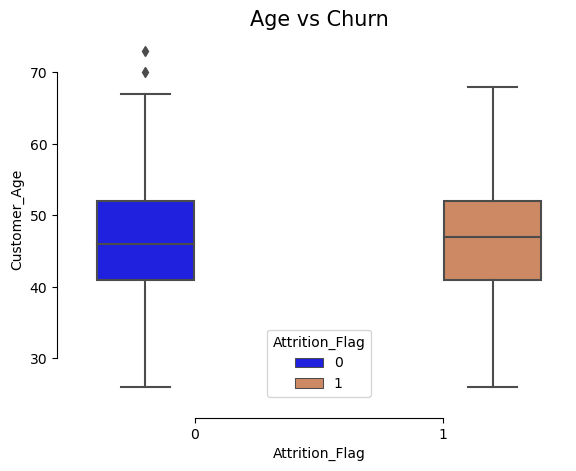

In [97]:
import seaborn as sns
sns.boxplot(x="Attrition_Flag", y="Customer_Age",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Age vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

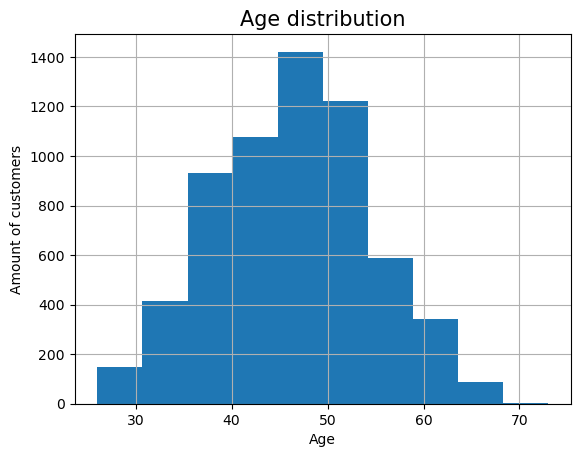

In [101]:
dataset["Customer_Age"].hist()
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

In [118]:
churned = data[data['Attrition_Flag'] == 1]
nonchurned = data[data['Attrition_Flag'] == 0]

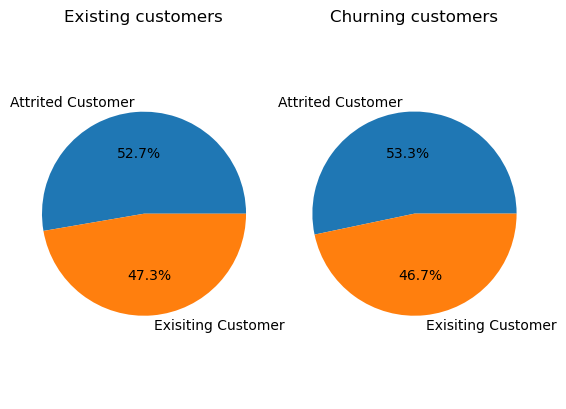

In [124]:
churnedtarget = churned["Gender"].value_counts()
nonchurnedtarget = nonchurned["Gender"].value_counts()

fig1, axs = plt.subplots(1, 2)

axs[0].pie(churnedtarget, labels=['Attrited Customer','Exisiting Customer'], autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=['Attrited Customer','Exisiting Customer'], autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

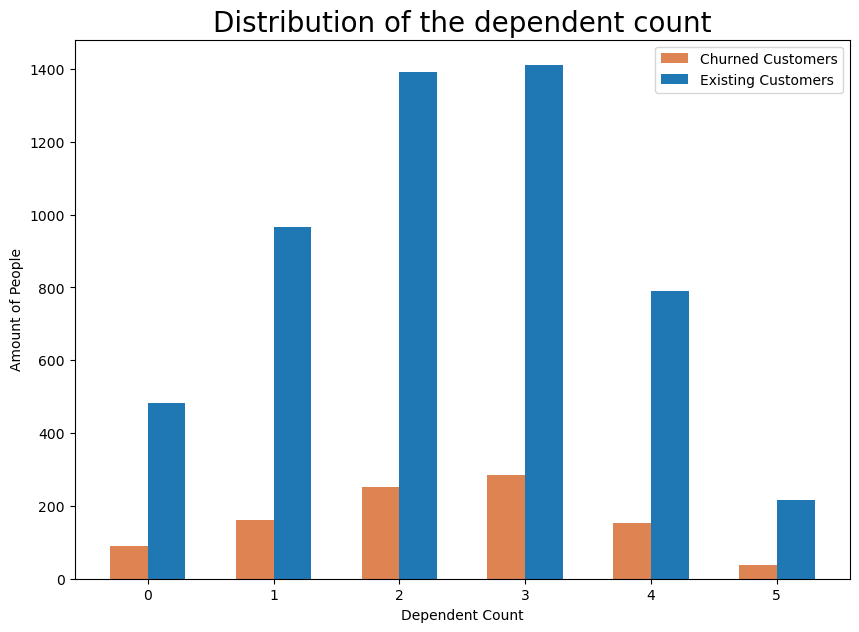

In [126]:
N = 6
ChurnedCounts = churned["Dependent_count"].value_counts().sort_index()
NonChurnedCounts = nonchurned["Dependent_count"].value_counts().sort_index()

ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

figs, axs = plt.subplots(figsize=(10,7))

axs.bar(ind - width/2, ChurnedCounts, width, color = "#DD8452")
axs.bar(ind + width/2, NonChurnedCounts, width)

axs.set_xlabel('Dependent Count')
axs.set_ylabel('Amount of People')
axs.set_title('Distribution of the dependent count', fontsize=20)
# axs.set_xticks(ind, ('0', '1', '2', '3', '4', '5'))
axs.legend(('Churned Customers','Existing Customers',))

plt.show()

In [132]:
def plot_pie(column):
    target = data[column].value_counts()    
    fig1, ax1 = plt.subplots()    
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()

In [138]:
a = data['Education_Level'].value_counts()

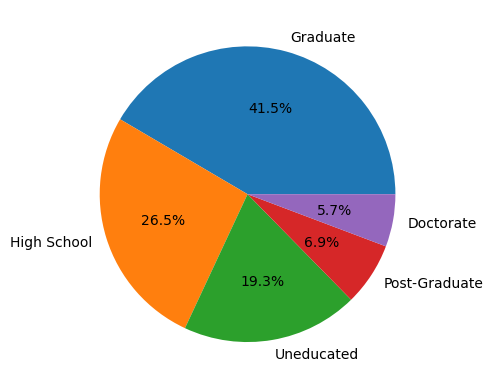

In [143]:
plt.pie(a,labels=a.index,autopct='%1.1f%%', shadow=None);

In [141]:
a.index

Index(['Graduate', 'High School', 'Uneducated', 'Post-Graduate', 'Doctorate'], dtype='object')

In [147]:
CEL = churned["Education_Level"].value_counts().sort_index()
nCEL = nonchurned["Education_Level"].value_counts().sort_index()

In [151]:
churned["Dependent_count"].value_counts().sort_index()

0     90
1    162
2    252
3    285
4    153
5     39
Name: Dependent_count, dtype: int64

In [153]:
CEL = CEL.squeeze()

In [159]:
CEL.index = [0,1,2,3,4]
nCEL.index = [0,1,2,3,4]

In [158]:
CEL

0     75
1    406
2    237
3     77
4    186
Name: Education_Level, dtype: int64

In [161]:
def plot_compare(column, category_name):
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())
    
    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()
    
    indchurned = np.arange(NChurned)    # the x locations for the groups
    indnonchurned = np.arange(NNonChurned)    
    width = 1       # the width of the bars: can also be len(x) sequence
    
    figs, axs = plt.subplots(1,2, figsize=(12,5))
    
    axs[1].bar(indchurned, ChurnedCounts, width, color='#DD8452')
    axs[1].set_title('Churned ' + category_name, fontsize=20)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45)
    
    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='b')
    axs[0].set_title('Non Churned ' + category_name, fontsize=20)
    axs[0].set_ylabel('Amount of People')
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45)
    
    
    plt.show()

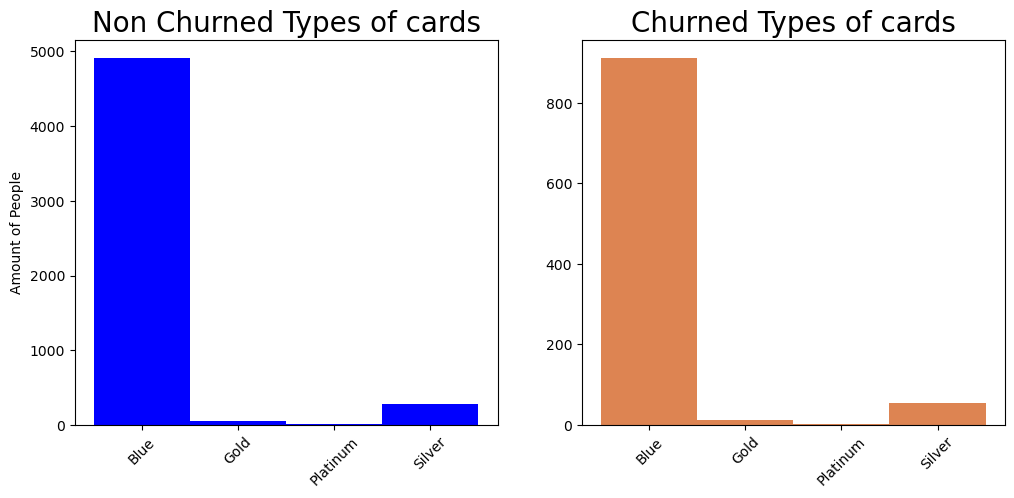

In [162]:
plot_compare("Card_Category", "Types of cards")

In [165]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')

In [178]:
imb = data['Attrition_Flag'].value_counts()

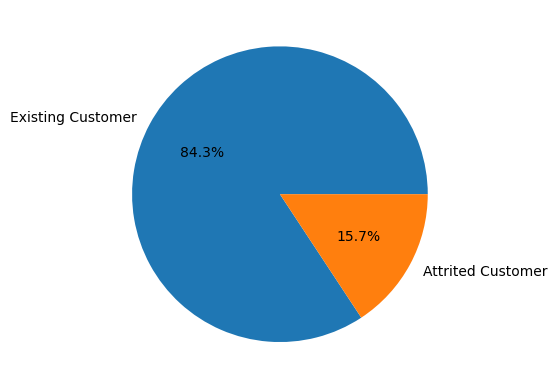

In [181]:
plt.pie(imb,labels=['Existing Customer','Attrited Customer'],autopct='%1.1f%%', shadow=None)
#plt.savefig('imb_data.png');

In [204]:
b = Y_train.value_counts()

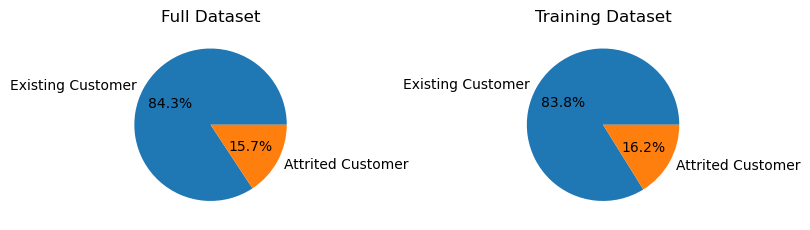

In [207]:
fig = plt.figure(figsize=(8,6))

ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

ax1.pie(imb,labels=['Existing Customer','Attrited Customer'],autopct='%1.1f%%', shadow=None)
ax1.set_title('Full Dataset')

ax2.pie(b,labels=['Existing Customer','Attrited Customer'],autopct='%1.1f%%', shadow=None)
ax2.set_title('Training Dataset')

fig.tight_layout()
fig.savefig('imb2.png', format='png')